# 2.3 Feature Selection

## Steps:
1. Use Feature Importance (Random Forest / XGBoost feature importance scores) to rank variables.
2. Apply Recursive Feature Elimination (RFE) to select the best predictors.
3. Use Chi-Square Test to check feature significance.
4. Select only the most relevant features for modeling.

## Deliverable:
-  Reduced dataset with selected key features
-  Feature importance ranking visualization


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE,chi2
from sklearn.preprocessing import MinMaxScaler

In [14]:
data = pd.read_csv('../data/clean_data.csv')
X = data.drop(columns=['num'])
y = data['num']

# Feature Importance from Random Forest

In [15]:
model = RandomForestClassifier()
model.fit(X, y)
importances = model.feature_importances_

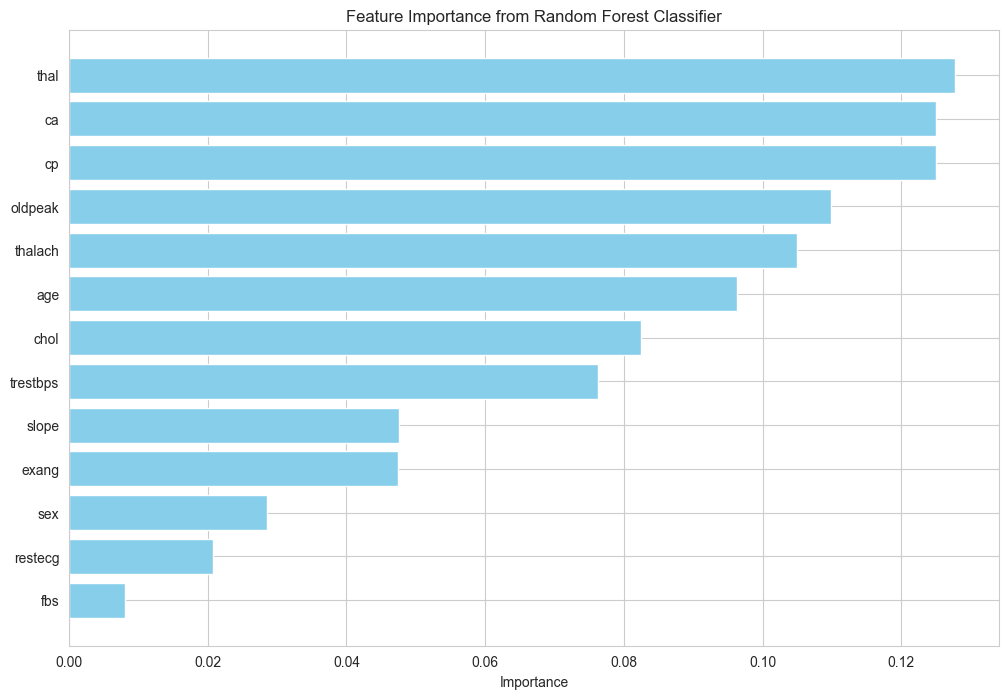

In [16]:
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest Classifier')
plt.gca().invert_yaxis()
plt.show()

# Recursive Feature Elimination (RFE)

In [17]:
selector = RFE(model)#, n_features_to_select=10)
selector.fit(X, y)
selected_features = X.columns[selector.support_]
importances = model.feature_importances_

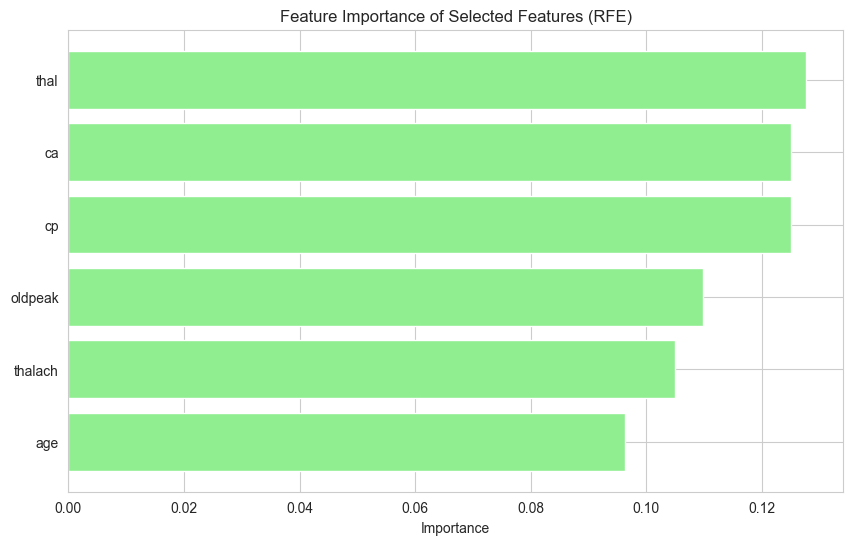

In [18]:

importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
importance_df = importance_df[importance_df['Feature'].isin(selected_features)].sort_values(by='Importance',
                                                                                            ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='lightgreen')
plt.xlabel('Importance')
plt.title('Feature Importance of Selected Features (RFE)')
plt.gca().invert_yaxis()
plt.show()

# Chi-Square Test

In [19]:
# Apply Min-Max Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Perform Chi-Square Test 
chi2_values, p_values = chi2(X_scaled, y)

# Create a DataFrame for results
chi2_results = pd.DataFrame({'Feature': X.columns, 'Chi2': chi2_values, 'p-value': p_values})
print(chi2_results[chi2_results['p-value'] < 0.05])


    Feature       Chi2       p-value
1       sex   7.432845  6.404399e-03
2        cp   7.384879  6.577449e-03
6   restecg   4.322448  3.761276e-02
8     exang  38.052613  6.886243e-10
9   oldpeak  11.382669  7.413251e-04
10    slope  10.984336  9.188519e-04
11       ca  27.190933  1.843211e-07
12     thal  44.665421  2.337493e-11


In [20]:
importance_df['Feature']

12       thal
11         ca
2          cp
9     oldpeak
7     thalach
0         age
Name: Feature, dtype: object

In [21]:
chi2_results[chi2_results['p-value'] < 0.05]['Feature']


1         sex
2          cp
6     restecg
8       exang
9     oldpeak
10      slope
11         ca
12       thal
Name: Feature, dtype: object

In [22]:
set(chi2_results[chi2_results['p-value'] < 0.05]['Feature']).union(set(importance_df['Feature']))


{'age',
 'ca',
 'cp',
 'exang',
 'oldpeak',
 'restecg',
 'sex',
 'slope',
 'thal',
 'thalach'}

# Saving best features by RFE and Chi test


In [23]:

rfe = data[importance_df['Feature']].copy()
rfe['num'] = data['num']
rfe.to_csv('../data/features_selected_rfe.csv',index=False)

In [24]:

chi = data[chi2_results[chi2_results['p-value'] < 0.05]['Feature']].copy()
chi['num'] = data['num']
chi.to_csv('../data/features_selected_chi.csv',index=False)